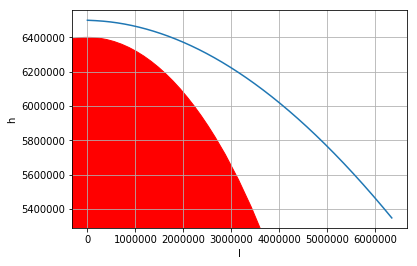

In [303]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.misc import derivative

def glide(y, t, b, a, g, r0):
    r = m.sqrt(y[0]**2 + y[1]**2)
    v = m.sqrt(y[2]**2 + y[3]**2) 
    if(r<=6400000 or v>=55000):
        return([0,0,0,0])
    else:
        grav = 9.81*r0**2/(r**2)
        g = [-y[0]*grav/r, -y[1]*grav/r]
        k = a*(np.e**(-b*np.abs(r-r0)))
        
        glide = 4.0
        if(r>6500000):
            glide = 0
        
        dy0 = y[2]
        dy1 = y[3]
        
        dy2 = g[0]-k*((y[2])**3/np.abs(y[2])) - np.sign(y[2]*y[3])*k*glide*((y[2])**3/np.abs(y[2]))
        dy3 = g[1]-k*((y[3])**3/np.abs(y[3])) + np.sign(y[2]*y[3])*k*glide*((y[3])**3/np.abs(y[3]))
        return [dy0, dy1, dy2, dy3]
    
def dif(y, t, b, a, g, r0):
    r = m.sqrt(y[0]**2 + y[1]**2)
    v = m.sqrt(y[2]**2 + y[3]**2) 
    atm = 1
    if(r>6500000):
        atm = 0
    if(r<=6400000 or v<=500):
        return([0,0,0,0])
    
    else:
        grav = 9.81*r0**2/(r**2)
        g = [-y[0]*grav/r, -y[1]*grav/r]
        k = a*(np.e**(-b*np.abs(r-r0)))
        
        dy0 = y[2]
        dy1 = y[3]
        
        dy2 = g[0]-k*((y[2])**3/np.abs(y[2]))*atm
        dy3 = g[1]-k*((y[3])**3/np.abs(y[3]))*atm
        return dy0, dy1, dy2, dy3   


r0 = 6400000
g = [0,0]





h = 100000
c = 5000






maxa=[]
maxmoc=[]
fiji=[]



for c in [11000]:

    fi=0.01
    #print(fi)
    #fiji.append(fi)
    hitrost = [c*np.cos(fi), -c*np.sin(fi)]
    lokac = [0.0, h]
    visina = []
    pospesek = []
    moc = []

    b = 9.81/(287*300)
    a = 0.05
    #print (hitrost)
    y0 = [lokac[0], lokac[1]+r0, hitrost[0], hitrost[1]]



    t=[]
    t = np.arange(0,520, 0.01)
    kapsula = []
    kapsula = odeint(glide, y0, t, args=(b, a, g, r0))

    hitrost=[]
    pospesek=[]
    visina=[]

    for j in range (len(kapsula[:,2])):
        hitrost.append(m.sqrt(kapsula[j,2]**2+kapsula[j,3]**2))
        visina.append(m.sqrt(kapsula[j,0]**2+kapsula[j,1]**2)-r0)

        k = a*(np.e**(-b*np.abs(visina[j])))
        #oc.append((k*hitrost[j]**3)*5)


    for l in range (len(kapsula[:,2])-1):
        pospesek.append((hitrost[l+1]-hitrost[l])/(t[l+1]-t[l]))
    pospesek.append(pospesek[-1])    


    #plt.plot(t, hitrost)
    #plt.xlabel('čas')
    #plt.ylabel('hitrost')

   #print('Koncna hitrost: '+ str(hitrost[-1]))

    #plt.savefig("graf1.pdf", bbox_inches='tight')
    #plt.grid()
    #plt.show()

    #plt.plot(t, pospesek)
    #plt.xlabel('čas')
    #plt.ylabel('pospešek')

   #print('Maksimalni pospešek: ' + str(max([-min(pospesek), max(pospesek)])))

    #plt.savefig("graf1.pdf", bbox_inches='tight')
    #plt.grid()
    #plt.show()
    plt.plot(kapsula[:,0], kapsula[:,1])
    #plt.plot(t, visina)
    #plt.xlabel('čas')
    #plt.ylabel('višina')
    #rint('Končna višina: ' + str(visina[-1]))

    #plt.savefig("graf1.pdf", bbox_inches='tight')
    #plt.grid()
    #plt.show()

    #plt.plot(t, moc)
    #plt.xlabel('čas')
    #plt.ylabel('moc')
    #maxmoc.append(max(moc))
    maxa.append(-min(pospesek))
   #print('Maksimalna moč: ' + str(max(moc)))

    #plt.savefig("graf1.pdf", bbox_inches='tight')
    #plt.grid()
    #plt.show()
    

circle1=plt.Circle((0,0),6400000,color='r')
plt.gcf().gca().add_artist(circle1)
#plt.axis([-6600000, 6600000, -6600000, 6600000])
plt.xlabel('l')
plt.ylabel('h')

plt.savefig("grafglide.pdf", bbox_inches='tight')
plt.grid()
plt.show()
